 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [75]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class My_Video:
    def __init__(self, title, length, genre, director, top_billed_cast, cast):
        self.title = title
        self.length = length
        self.genre = genre
        self.director = director
        self.top_billed_cast = []
        self.cast = []
    
    def pick_video(self):
        choice = input("What do you want to watch? ")
        self.title = choice
        print(f"You are now watching {self.title}.")
        
    def length_video(self):
        len_vid = input("How long would you like to watch? ")
        self.length = length
        print(f"You're playtime is {self.length} minutes.")
    
    def genre_video(self):
        gen_vid = input("What genre would you like to watch? ")
        self.genre = gen_vid
        print(f"You're genre is {self.genre}.")
        
    def director_video(self):
        dir_vid = input("Who is the director? ")
        self.director = dir_vid
        print(f"{self.director} is now directing your video.")
        
    def cast_video(self):
        cast_vid = input("Who is cast in your video? ")
        self.cast.append(cast_vid)
        
    def top_billed(self):
        top_billed = input("Who is the highest paid? ")
        self.top_billed_cast.append(top_billed)
        
    def __repr__(self):
        return f"You're watching {self.title} it is a {self.genre} movie that is {self.length} minutes long. Enjoy"
    


## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>


In [76]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing: {self.title}")
        display(Image(self.link))
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."

## 3 INHERITANCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [77]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [110]:
import requests

class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.poster = None
        self.cast_list = []
        self.genres = []
        self.episodes = []
        
    def get_info(self, query = ''):
        data = None
        while not data:
            if not query:
                query = input("What is the name of the series? ")
            r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
            if r.status_code == 200:
                data = r.json()
            else:
                print(f'Series error: status code {r.status_code}')
                
        self.id = data['id']
        self.title = data['name']
        self.genres = [genre for genre in data['genres']]
        if data['image']:
            self.poster = data['image']['medium']
        else:
            self.poster = generic_image
        self.poster = data['image']['medium']
        self.summary = data['summary']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
        #API call for the episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f'Episode error: status code {r.status_code}')
            
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f'{self.title} has {len(self.episodes)} episodes')

        #   !!!!!!!!!!!!!!!! HERE IS MY CODE BELOW !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/cast')
        if r.status_code == 200:
            cast = r.json()
        else:
            print(f'Episode error: status code {r.status_code}')
        
        person = [d['person'] for d in cast]
        self.cast_list = [d['name'] for d in person]
        print(f":\nCast: \n {self.cast_list}")

        #  !!!!!!!!!!!!!!!!!  HERE IS MY CODE ABOVE !!!!!!!!!!!!!!!!!!!!!!!!!!!
        
        
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n ")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"

In [79]:
class User:
    id_counter = 1
    def __init__(self, username, password):
        self.username = username
        self.password = password[::-2]
        self.id = User.id_counter
        User.id_counter += 1
        self.watch_list = []
        
    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}
        """
        
        return formatted_user
    
    def __repr__(self):
        return f"<User {self.id} | {self.username}"
    
    def check_password(self, password_guess):
        return self.password == password_guess[::-2]

In [111]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Theater():
    def __init__(self):
        self.users = set()
        self.current_user = None
     # add a user   
    def add_user(self):
        username = input("Please enter a username: ")
        if username in {u.username for u in self.users}:
            print("User with that name already exists. Please try again...") #409, conflict in request
        else:
            password = input("Please enter your password: ")
            user = User(username, password)
            self.users.add(user)
            print(f"{user} has been created")
            
        self.login_user()
        
    #choose/login a user
    def login_user(self):
        username = input("What is your username? ")
        password = input("What is your password? ")
        
        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f"{user} has logged in!")
                break
        else:
            print("Username and/or password is incorrect!")
    
    #logout a user
    def logout(self):
        self.current_user = None
        print("You have succesfully logged out!")
        
    
    #update user info
    def update_user(self):
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username! ")
            if new_user.lower() != "skip":
                self.current_user.username = new_user
            new_pw = input("Please enter the updated password or enter skip to keep current password!")
            if new_pw.lower() != "skip":
                self.current_user.password = new_pw[::-2]
            print(f"{self.current_user.username}'s info has been updated")
                  
        else:
            print("please login to update user")
            self.login_user()
            
            
    
    #watchlist related functionality
    def add_to_watchlist(self, query=''):
        show = Series()
        show.get_info(query)
        
        self.current_user.watch_list.append(show)
        
        print(f"{show.title} has been added tp the watchlist!")
        
    #view watchlist
    def view_watch_list(self):
        for series in self.current_user.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.poster))
            
    #remove from watch_list
    def delete(self):
        print("Your current watchlist: ")
        self.view_watch_list()
        
        response = input("What would you like to delete? ")
        
        for series in self.current_user.watch_list:
            if series.title.title() == response.title():
                self.current_user.watch_list.remove(series)
                print(f"{response.title()} has been removed from your watchlist!" )
                break
                
        else:
            print("That title is not in your watch list! ") #404 not found
            
            
    #choose a series from your watch list
    def choose_from_watch_list(self):
        self.view_watch_list()
        
        watch = input("What would you like to watch? ")
        if watch.lower() in list(map(lambda x: x.title.lower(), self.current_user.watch_list)):
            for series in self.current_user.watch_list:
                if series.title.lower() == watch.lower():
                    series.watch()
                    
        else:
            response = input(f"{watch} is not in your watchlist...would you like to add it? y/n")
            if response in ('y', 'yes'):
                self.add_to_watchlist(watch)
                
                print("............")
                sleep(2)
                print("............")
                self.current_user.watch_list[-1].watch()
    
    #run method to drive program            
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        
        display(Image(generic_image))
        
        if self.users:
            self.login_user()
        else:
            self.add_user()
        
        print("""
            What would you like to do?
            Add - add a new user
            Login - login a user
            Update - update a user
            Logout - logout a user
            Search - search for shows
            Watch - pick something from your watchlist
            View - view watch list
            Delete - remove show from watch list
            Quit - close the application
            """)
        
        while True:
            response = input("What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)")
            
            if response.lower() == "search":
                self.add_to_watchlist()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "logout":
                self.logout()
                new_response = input("What would you like to do next, login, add, quit?")
                if new_response.lower() == "add":
                    self.add_user()
                elif new_response.lower() == "login":
                    self.login_user()
                elif new_response.lower() == "quit":
                    print("thanks for watching!")
                    break
                    
                else:
                    print("Please enter a valid response and try again!")
                    
            elif response.lower() == "login":
                self.login_user()
                
            elif response.lower() == "update":
                self.update_user()
                
            elif response.lower() == "view":
                self.view_watch_list()
            elif response.lower() == "delete":
                self.delete()
            elif response.lower() == "quit":
                print(f"Thanks for watching! {self.current_user}! Now go outside!")
            else:
                print("Invalid input, please try again!")                 

In [81]:
codeflix = Theater()

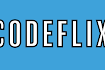

What is your username? j
What is your password? j1

        1 - J
        pw: 1
         has logged in!

            What would you like to do?
            Add - add a new user
            Login - login a user
            Update - update a user
            Logout - logout a user
            Search - search for shows
            Watch - pick something from your watchlist
            View - view watch list
            Delete - remove show from watch list
            Quit - close the application
            
What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)view


Title: Scrubs | Episodes: 182

Summary: 
 <p>Fresh out of medical school, new doctors John "J.D." Dorian, his best friend Christopher Turk, and Elliot Reid start their internship at Sacred Heart Hospital. There, they meet the harsh Chief of Medicine Dr. Bob Kelso, J.D.'s reluctant mentor Dr. Perry Cox, nurse Carla Espinosa, and the deceitful and prankish Janitor. Also at the hospital are t

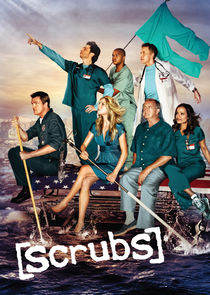



Title: Scrubs | Episodes: 182

Summary: 
 <p>Fresh out of medical school, new doctors John "J.D." Dorian, his best friend Christopher Turk, and Elliot Reid start their internship at Sacred Heart Hospital. There, they meet the harsh Chief of Medicine Dr. Bob Kelso, J.D.'s reluctant mentor Dr. Perry Cox, nurse Carla Espinosa, and the deceitful and prankish Janitor. Also at the hospital are the wide range of personalities of Sacred Heart's staff, including the religious nurse Laverne Roberts, incompetent lawyer Ted Buckland, and spiteful board member Jordan Sullivan who also happens to be Cox's ex-wife. Other interns make the cut, such as the high-fiving Todd Quinlan and nervous Doug Murphy. Over the next 9 years they face personal and professional highs and lows, realizing that they can't make it through life - much less a hectic job as a doctor - on their own.</p>


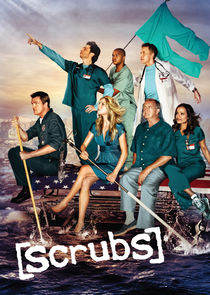



Title: Scrubs | Episodes: 182

Summary: 
 <p>Fresh out of medical school, new doctors John "J.D." Dorian, his best friend Christopher Turk, and Elliot Reid start their internship at Sacred Heart Hospital. There, they meet the harsh Chief of Medicine Dr. Bob Kelso, J.D.'s reluctant mentor Dr. Perry Cox, nurse Carla Espinosa, and the deceitful and prankish Janitor. Also at the hospital are the wide range of personalities of Sacred Heart's staff, including the religious nurse Laverne Roberts, incompetent lawyer Ted Buckland, and spiteful board member Jordan Sullivan who also happens to be Cox's ex-wife. Other interns make the cut, such as the high-fiving Todd Quinlan and nervous Doug Murphy. Over the next 9 years they face personal and professional highs and lows, realizing that they can't make it through life - much less a hectic job as a doctor - on their own.</p>


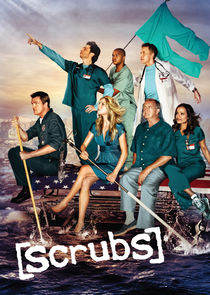



Title: Scrubs | Episodes: 182

Summary: 
 <p>Fresh out of medical school, new doctors John "J.D." Dorian, his best friend Christopher Turk, and Elliot Reid start their internship at Sacred Heart Hospital. There, they meet the harsh Chief of Medicine Dr. Bob Kelso, J.D.'s reluctant mentor Dr. Perry Cox, nurse Carla Espinosa, and the deceitful and prankish Janitor. Also at the hospital are the wide range of personalities of Sacred Heart's staff, including the religious nurse Laverne Roberts, incompetent lawyer Ted Buckland, and spiteful board member Jordan Sullivan who also happens to be Cox's ex-wife. Other interns make the cut, such as the high-fiving Todd Quinlan and nervous Doug Murphy. Over the next 9 years they face personal and professional highs and lows, realizing that they can't make it through life - much less a hectic job as a doctor - on their own.</p>


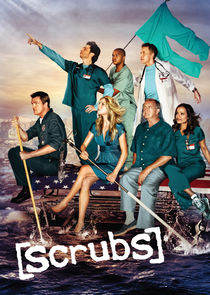



Title: Scrubs | Episodes: 182

Summary: 
 <p>Fresh out of medical school, new doctors John "J.D." Dorian, his best friend Christopher Turk, and Elliot Reid start their internship at Sacred Heart Hospital. There, they meet the harsh Chief of Medicine Dr. Bob Kelso, J.D.'s reluctant mentor Dr. Perry Cox, nurse Carla Espinosa, and the deceitful and prankish Janitor. Also at the hospital are the wide range of personalities of Sacred Heart's staff, including the religious nurse Laverne Roberts, incompetent lawyer Ted Buckland, and spiteful board member Jordan Sullivan who also happens to be Cox's ex-wife. Other interns make the cut, such as the high-fiving Todd Quinlan and nervous Doug Murphy. Over the next 9 years they face personal and professional highs and lows, realizing that they can't make it through life - much less a hectic job as a doctor - on their own.</p>


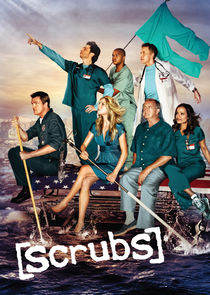

What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)search
What is the name of the series? scrubs
Scrubs has 182 episodes
:
Cast: 
 ['Donald Faison', 'John C. McGinley', 'Zach Braff', 'Ken Jenkins', 'Sarah Chalke', 'Neil Flynn', 'Judy Reyes', 'Eliza Coupe', 'Kerry Bishé', 'Michael Mosley', 'Dave Franco']
Scrubs has been added tp the watchlist!


In [ ]:
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...